In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [2]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)

## EXPLORACIÓN INICIAL

Targer = SPECIES. 
MODELO CLASIFICACIÓN MÚLTICLASE/MÚLTIPLE
EN ESTOS MODELOS HAY QUE SABER SI LA TARGET ESTA BALANCEADA. SI NO LO ESTÁ, NO PODEMOS HACER ACCURACY, NO TENDRIA SENTIDO. PRECISION Y RECALL SERÍAN MÁS ACERTADOS SI NO LO ESTÁ.

In [3]:
df = data.copy()

In [4]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
df.drop(columns='rowid', axis = 1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [7]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [9]:
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [10]:
df[df.duplicated()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


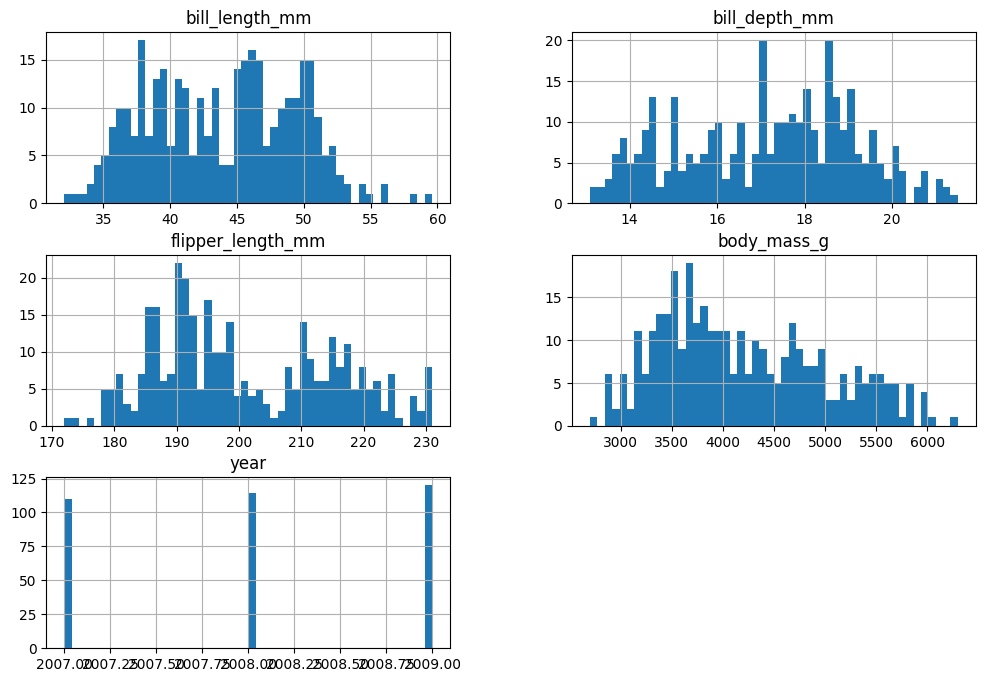

In [11]:
df.hist(bins=50, figsize=(12,8))
plt.show()
# vemos las distribuciones, las escalas

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Figure size 1000x800 with 0 Axes>

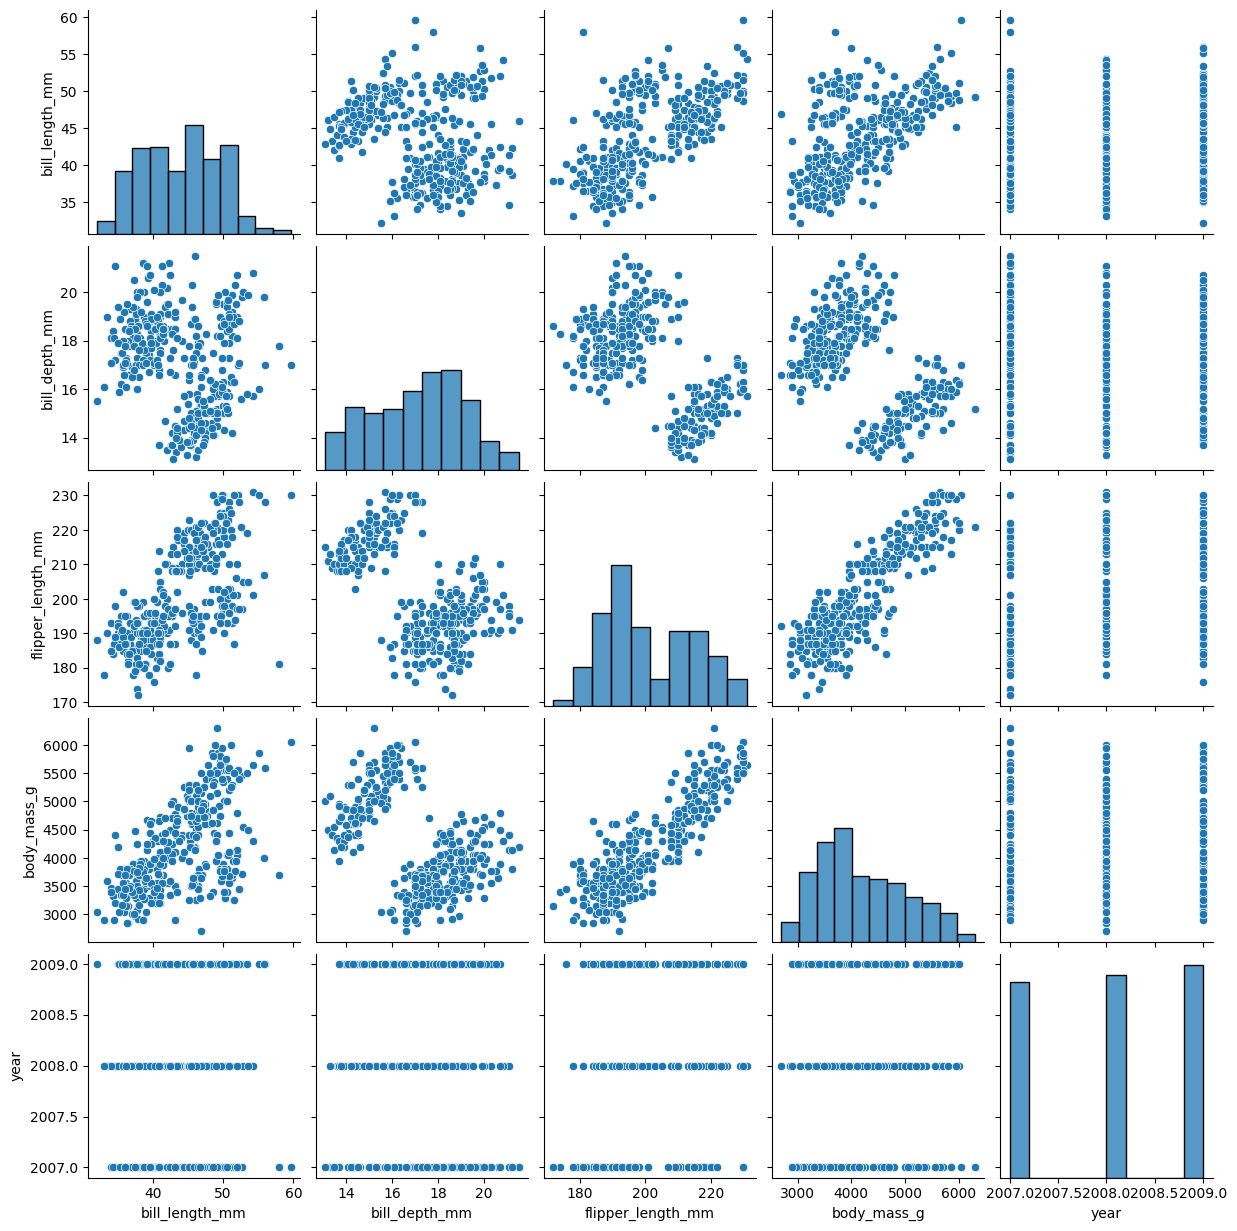

In [12]:

plt.figure(figsize=(10,8))
sns.pairplot(df, kind='scatter')

## Mini-EDA

In [13]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [14]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<Axes: >

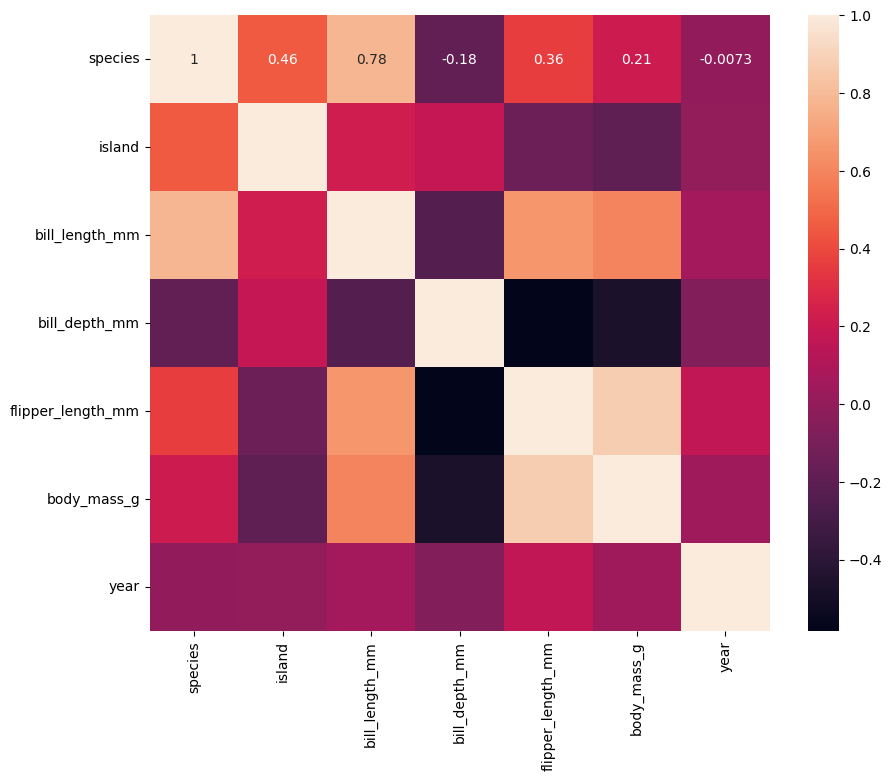

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.replace({'Adelie':0, 'Gentoo': 1, 'Chinstrap':2,'Torgersen':0, 'Biscoe':1, 'Dream':2}).corr(numeric_only=True), annot=True)
# asignando valores a las categorias, podemos graficar todas las variables. El replace se podria hacer también con un map.
# ¿qué variables son colineales? las que tengan alta correlación. dos qeue tengan mucha correlacion es decir que tengan mucha dependencia, podríamso descartar la que tenga menos correlación respecto a la target. 
# Este descaret lo hariamos una vez probado el modelo con todas las col, y luego probar a ver si esta columna hace 'ruido' al modelo.

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='species', ylabel='count'>

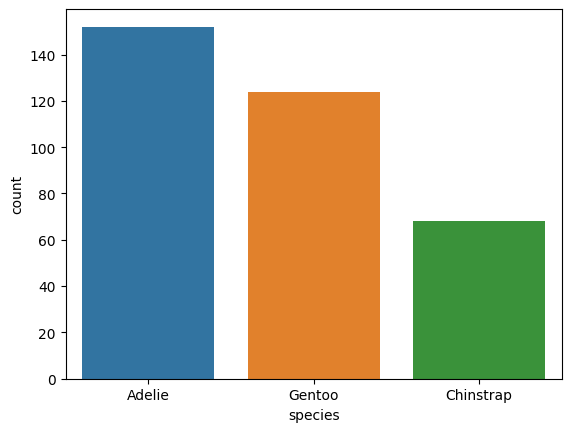

In [16]:
sns.countplot(x= df['species'])
# sns.countplot(x= 'species', data=df)  es lo mismo


TARGET :¿ESTÁ DESEQUILIBRADO? ¿ESTÁ MUY DESEQUILIBRADO? 

In [17]:
df['species'].value_counts()/len(df['species'])*100
# valores relativos

species
Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: count, dtype: float64

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='island', ylabel='count'>

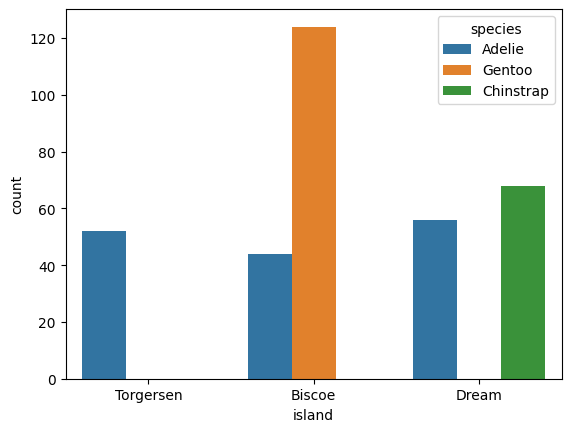

In [18]:
sns.countplot(x='island', hue='species', data=df)

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

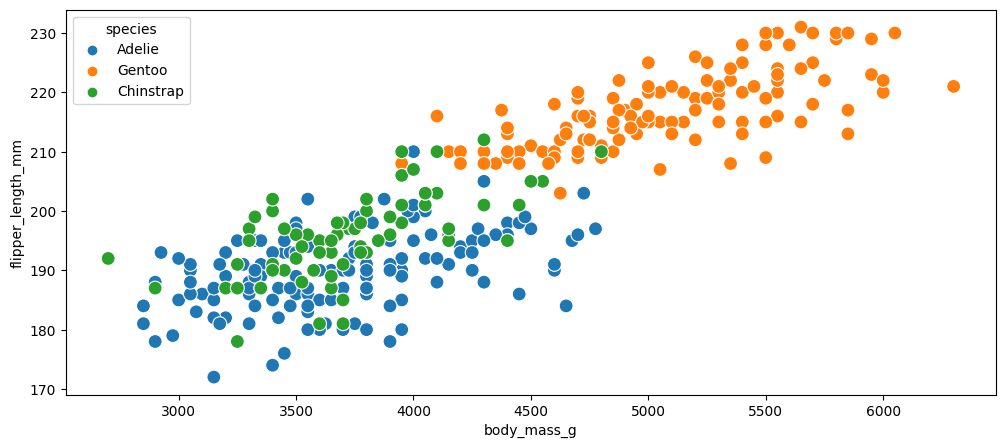

In [19]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['body_mass_g'],
                y=df['flipper_length_mm'],
                hue = df['species'],
                s=100);

## TRATAMIENTO NULOS Y VALORES ATÍPICOS

forward fill 
fillna
¿qué variables utilizo?

In [20]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [21]:
df.mean(numeric_only=True)


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [22]:
numeric_cols = ['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in df: 
    df[numeric_cols].fillna(df.mean(numeric_only=True), inplace=True)


C:\Users\laura\AppData\Local\Temp\ipykernel_23624\2514162518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols].fillna(df.mean(numeric_only=True), inplace=True)
C:\Users\laura\AppData\Local\Temp\ipykernel_23624\2514162518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols].fillna(df.mean(numeric_only=True), inplace=True)
C:\Users\laura\AppData\Local\Temp\ipykernel_23624\2514162518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [23]:
# sex_mode = df['sex'].mode() #devuelve una serie, por eso abajo no sirve tal cual 
sex_mode = df['sex'].mode().iloc[0]
df['sex'].fillna(sex_mode, inplace=True)

In [24]:
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)  #juan ha imputado la mediana en este y body mass, porque son enteros y la media tiene decimales. TENER EN CUENTA LA DISTRIBUCIÓN
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [25]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## DIVISIÓN DE DATOS

In [32]:
train, test = train_test_split(df, test_size=0.8, random_state=42)

# hemos quitado especies de la x porq es target


## TRANSFORMACIÓN: ESCALADO Y/O NORMALIZACIÓN DE LOS DATOS

In [27]:
train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
207,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,male,2008
212,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,female,2008
322,Chinstrap,Dream,50.1,17.9,190.0,3400.0,female,2009
251,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,male,2009
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
...,...,...,...,...,...,...,...,...
188,Gentoo,Biscoe,42.6,13.7,213.0,4950.0,female,2008
71,Adelie,Torgersen,39.7,18.4,190.0,3900.0,male,2008
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,female,2009
270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009


In [28]:
from sklearn.pipeline import make_pipeline

In [29]:
numeric_features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g', 'year']
categorical_features = ['species','island', 'sex']

In [30]:
numeric_transformer = make_pipeline(StandardScaler())

categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
        ]
        )

NameError: name 'ColumnTransformer' is not defined

In [ ]:
# model = make_pipeline(preprocessor, LogisticRegression() )

## BASELINES y SELECCIÓN DE MODELO


## PREDICCIÓN

## REVERTIR TRANSFORMACIONES

## VALIDAR MODELO